# Demo of main models used in the paper: "Noise reduction in CT using Learned Wavelet-Frame Shrinkage Networks"

This Jupyter notebook replicates some of the relevant resolus shown in the paper "Noise reduction in CT using Learned Wavelet-Frame Shrinkage Networks" which is in review process at IEEE's Transactions on medical imaging. The things to be demonstrated are the following:

    1. An overview of the noise reduction performance of the LWFSN, rLWFSN, tight frame (TF) U-Net and FBPConvNet
    2. A demonstration of the impulse response of the LWFSN and rLWFSN
    3. Showing that the LWFSN is capable of reconstructing a given noisy image if the soft-shrinkage section is disabled

## Data directory and models

First of all, we load the diverse models that we are going to test. Starting by our proposed (rLWFSN) and the two references: FBPConvNet and the tight frame U-Net.

In [1]:
%matplotlib inline

# Imports
import torch

# Loading CNN code
from cnnModels.lwfsn import lwfsn_2d
from cnnModels.rlwfsn import rlwfsn_2d
from cnnModels.fbpconvnet import fpbConvNet2d
from cnnModels.tfunet import rtfunet_2d


# Instantiating networks
# LWFSN
lwfsn = lwfsn_2d(1, 4, 8).float().cuda()
lwfsn.load_state_dict(torch.load( "./cnnWeights/LWFSN_L2_l4_wf8_ep500.pyt" ))
lwfsn.eval();

rlwfsn = rlwfsn_2d(1, 4, 8).float().cuda()
rlwfsn.load_state_dict(torch.load( "./cnnWeights/rLWFSN_L2_l4_wf8_ep200.pyt" ))
rlwfsn.eval();

tfu = rtfunet_2d(1, 4, 48).float().cuda()
tfu.load_state_dict(torch.load( "./cnnWeights/rTFUNET_l4_wf48_ep12.pyt" ))
tfu.eval();

fbp = fpbConvNet2d(1, 4, 32).float().cuda()
fbp.load_state_dict(torch.load( "./cnnWeights/fpbConvNett_L2_l4_wf64_ep14.pyt" ))
fbp.eval();

dataDir = "./data/slicesCT_LWFSN.h5"

## Figure of noise reduction in CT slices

This section generates an image similar to Fig. 12 of the article. Although in this case, the rLWFSN is also included 

/home/s152030/NEXIS/dev/imageDenoising/conditional_gan/paper_specialissue/DEMO/testScripts/scriptImageNoiseReduction.py:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  gradient=True, full=True)


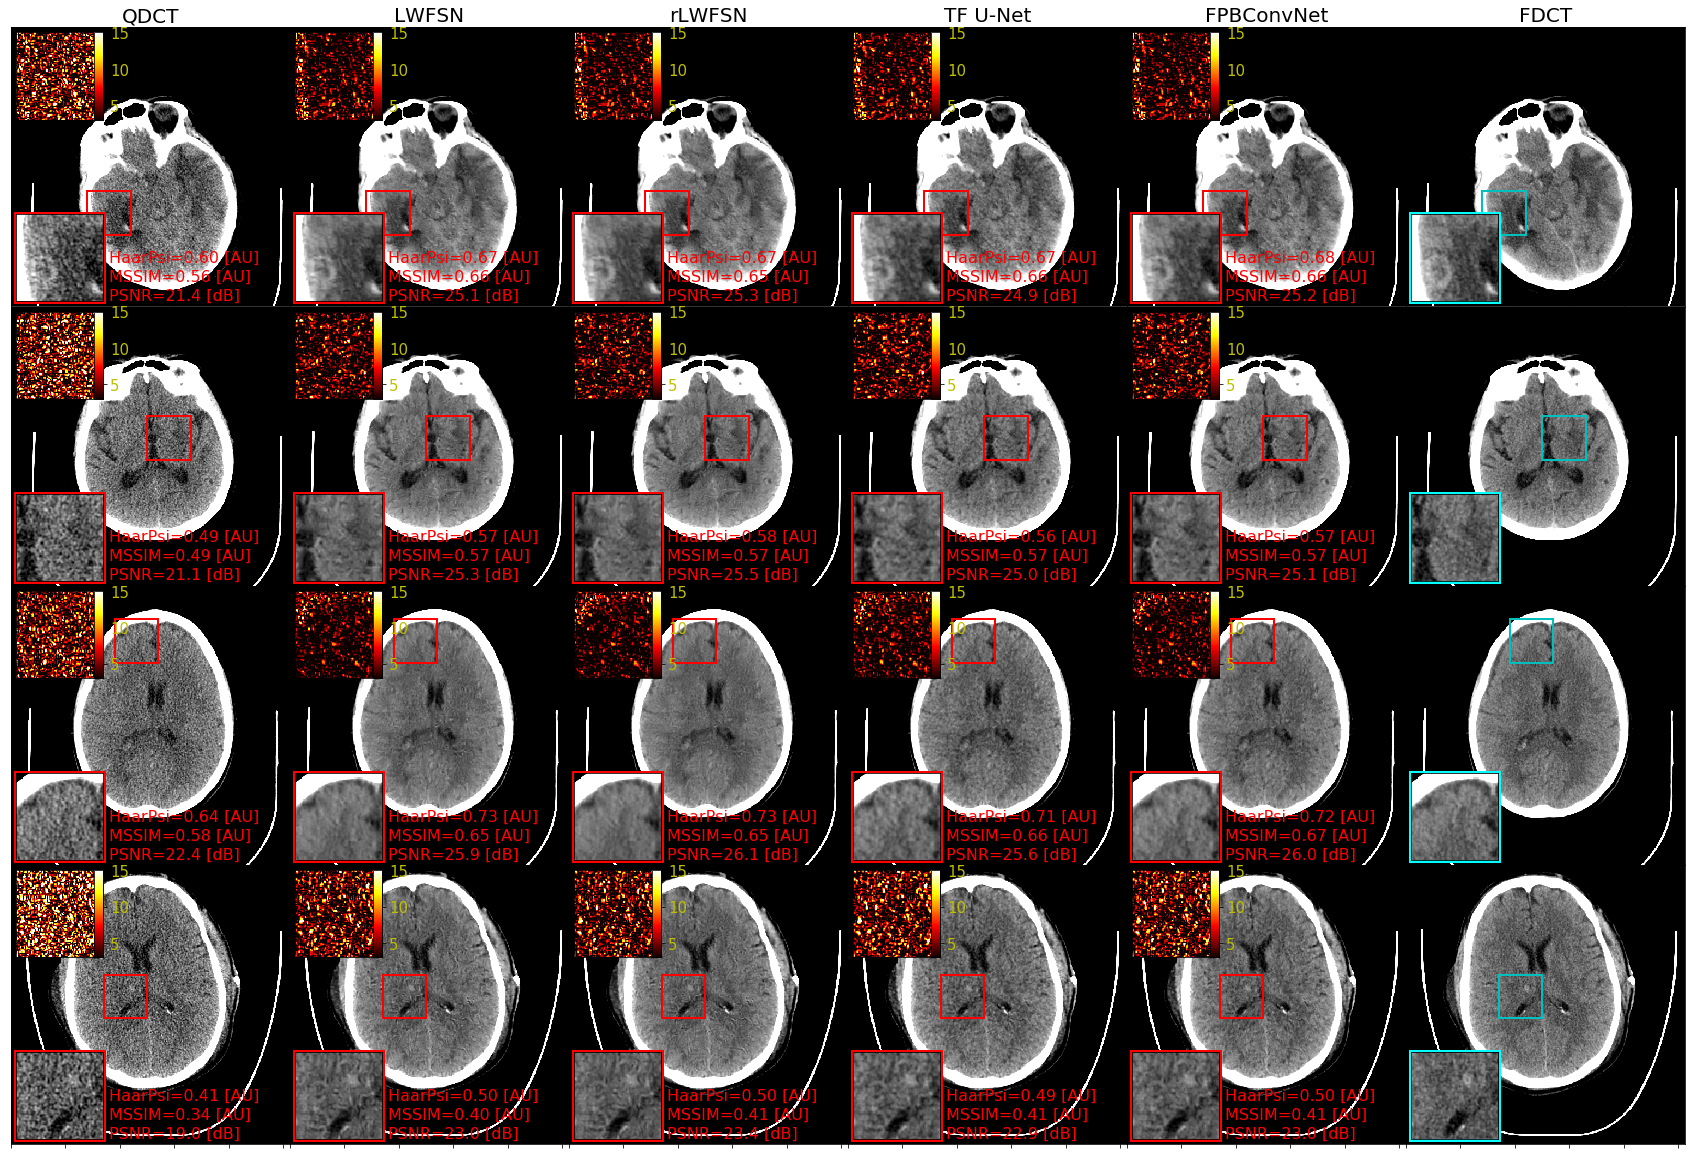

In [2]:
from testScripts.scriptImageNoiseReduction import figureNoiseReductionCNNComparison
figureNoiseReductionCNNComparison(dataDir, lwfsn, rlwfsn, tfu, fbp)

## Impulse response of LWFSN and rLWFSN

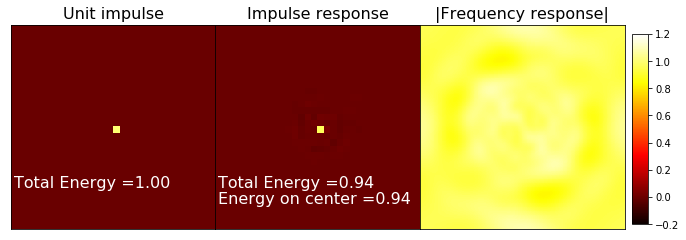

In [3]:
from testScripts.metrics import impulseResponseCNN
impulseResponseCNN(lwfsn)

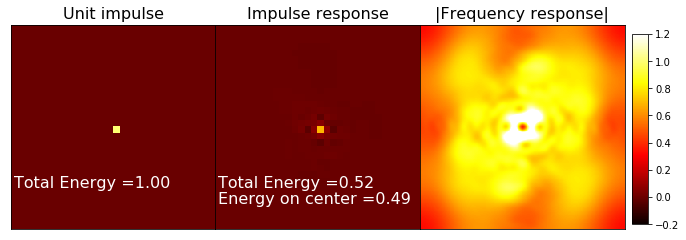

In [4]:
impulseResponseCNN(rlwfsn)

## Testing the signal reconstruction with the LWFSN

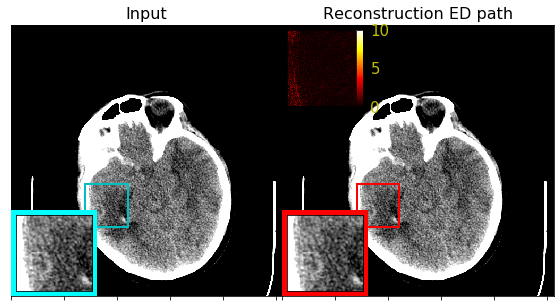

In [5]:
from testScripts.scriptImageNoiseReduction import reconLWFSN
reconLWFSN(dataDir, "N100", lwfsn, xc=140, yc=300, of=80, level=40, width=80)